GLDAS Anomalies Spatial Plot for data Visualization
Jessica Besnier
September 2022

In [1]:
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

from shapely.geometry import box, mapping

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import matplotlib.ticker as tck

import xarray as xr 
import salem
import rioxarray

import datetime as dt
from osgeo import gdal, ogr

import os

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
p_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/p_anomaly.nc4')
et_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/et_anomaly.nc4')
r_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/r_anomaly.nc4')

In [5]:
p_anomaly.precipitation

<xarray.DataArray 'precipitation' (time: 242, lon: 104, lat: 92)>
dask.array<open_dataset-87169daca391acebc30906de77323f33precipitation, shape=(242, 104, 92), dtype=float32, chunksize=(242, 104, 92), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -35.88 -35.62 -35.38 -35.12 ... -13.62 -13.38 -13.12
  * lon      (lon) float32 -67.88 -67.62 -67.38 -67.12 ... -42.62 -42.38 -42.12
  * time     (time) datetime64[ns] 2000-06-01 2001-01-01 ... 2021-04-01
    month    (time) int64 dask.array<chunksize=(242,), meta=np.ndarray>

In [3]:
shapefile_path = r'C:\Users\Jessica Besnier\Documents\Fall 2021\AGU data\river_basin_shape-file'
filename = ['la_plata']

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    p = p_anomaly.precipitation.salem.roi(shape=shdf)

    p_lat = p.dropna(dim='lat',how='all')
    p_lon = p_lat.dropna(dim='lon',how='all')

    return p_lon

la_plata_imerg = extract_values(0)

ValueError: operands could not be broadcast together with shapes (92, 104) (242, 104, 92) ()

In [ ]:
## Make spatial plot
date = '2005-07-01' #showing for the whole month of July- in mm/month
la_plata_imerg.sel(time=date).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True)

FROM GIGIS CODE

In [4]:
# Kernel: LV2 

import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

from shapely.geometry import box, mapping

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import matplotlib.ticker as tck

import xarray as xr 
import salem
import rioxarray

import datetime as dt

In [5]:
# Import shapefile of watershed: 
filename = ['la_plata'] ## Note: projected in WGS 84 
shdf = salem.read_shapefile('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/river_basin_shape-file/' + filename[0] + '.shp')

In [156]:
p_anomaly

<xarray.Dataset>
Dimensions:  (time: 228, lat: 88, lon: 100)
Coordinates:
  * lat      (lat) float32 -35.88 -35.62 -35.38 -35.12 ... -14.62 -14.38 -14.12
  * lon      (lon) float32 -67.88 -67.62 -67.38 -67.12 ... -43.62 -43.38 -43.12
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2021-12-01
Data variables:
    anom     (time, lat, lon) float32 dask.array<chunksize=(228, 88, 100), meta=np.ndarray>
Attributes:
    note:         climatology base period 2003-2020
    source_file:  ECMWF, CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc
    title:        GRACEFO_DA_CLSMF2.5_GLDAS2.2 Monthly Precipitation Anomaly
    history:      Thu Mar  3 13:01:04 2022: ncks -v anom -d lon,-68.0,-43.0 -...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...

In [6]:
# Spatial Plot of GPM Anomalies 

p_anomaly = xr.open_mfdataset('E:/2021/la_plata/gldas_da_anom/try_for_nc4/p_anom.nc4')
shapefile_path = r'C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/river_basin_shape-file/'
filename = ['la_plata'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    p = p_anomaly.anom.salem.roi(shape=shdf, all_touched = True)

    p_lat = p.dropna(dim='lat', how='all')
    p_lon = p_lat.dropna(dim='lon', how='all')

    return p_lon

LPRB_imerg = extract_values(0)


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [161]:
LPRB_imerg

<xarray.DataArray 'anom' (time: 228, lat: 87, lon: 95)>
dask.array<getitem, shape=(228, 87, 95), dtype=float32, chunksize=(228, 87, 95), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -35.62 -35.38 -35.12 -34.88 ... -14.62 -14.38 -14.12
  * lon      (lon) float32 -67.12 -66.88 -66.62 -66.38 ... -44.12 -43.88 -43.62
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2021-12-01
Attributes:
    long_name:       total precipitation
    units:           kg m-2 s-1
    anomaly_op_ncl:  Anomalies from Annual Cycle: calcMonAnomTLL: contributed...
    pyproj_srs:      +proj=longlat +datum=WGS84 +no_defs

In [7]:
# ET Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 1 #set colorbar max

date = '2016-08-01' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_imerg.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-67, -44, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='black', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Precipitation (mm)')

plt.title("Precipitation Anomalies (mm) on {}".format(date))

plt.savefig("E:/2021/la_plata/anom_spatial_plot_new/p_sub/2015.png")

NameError: name 'LPRB_imerg' is not defined

ET ANOM

In [8]:
#et anomaly values extracted
et_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/et_anomaly.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    et = et_anomaly.Evap_tavg.salem.roi(shape=shdf, all_touched = True)

    et_lat = et.dropna(dim='lat', how='all')
    et_lon = et_lat.dropna(dim='lon', how='all')

    return et_lon

LPRB_et = extract_values(0)

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, 'Evapotranspiration Anomalies (mm) on 2021-05-01')

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


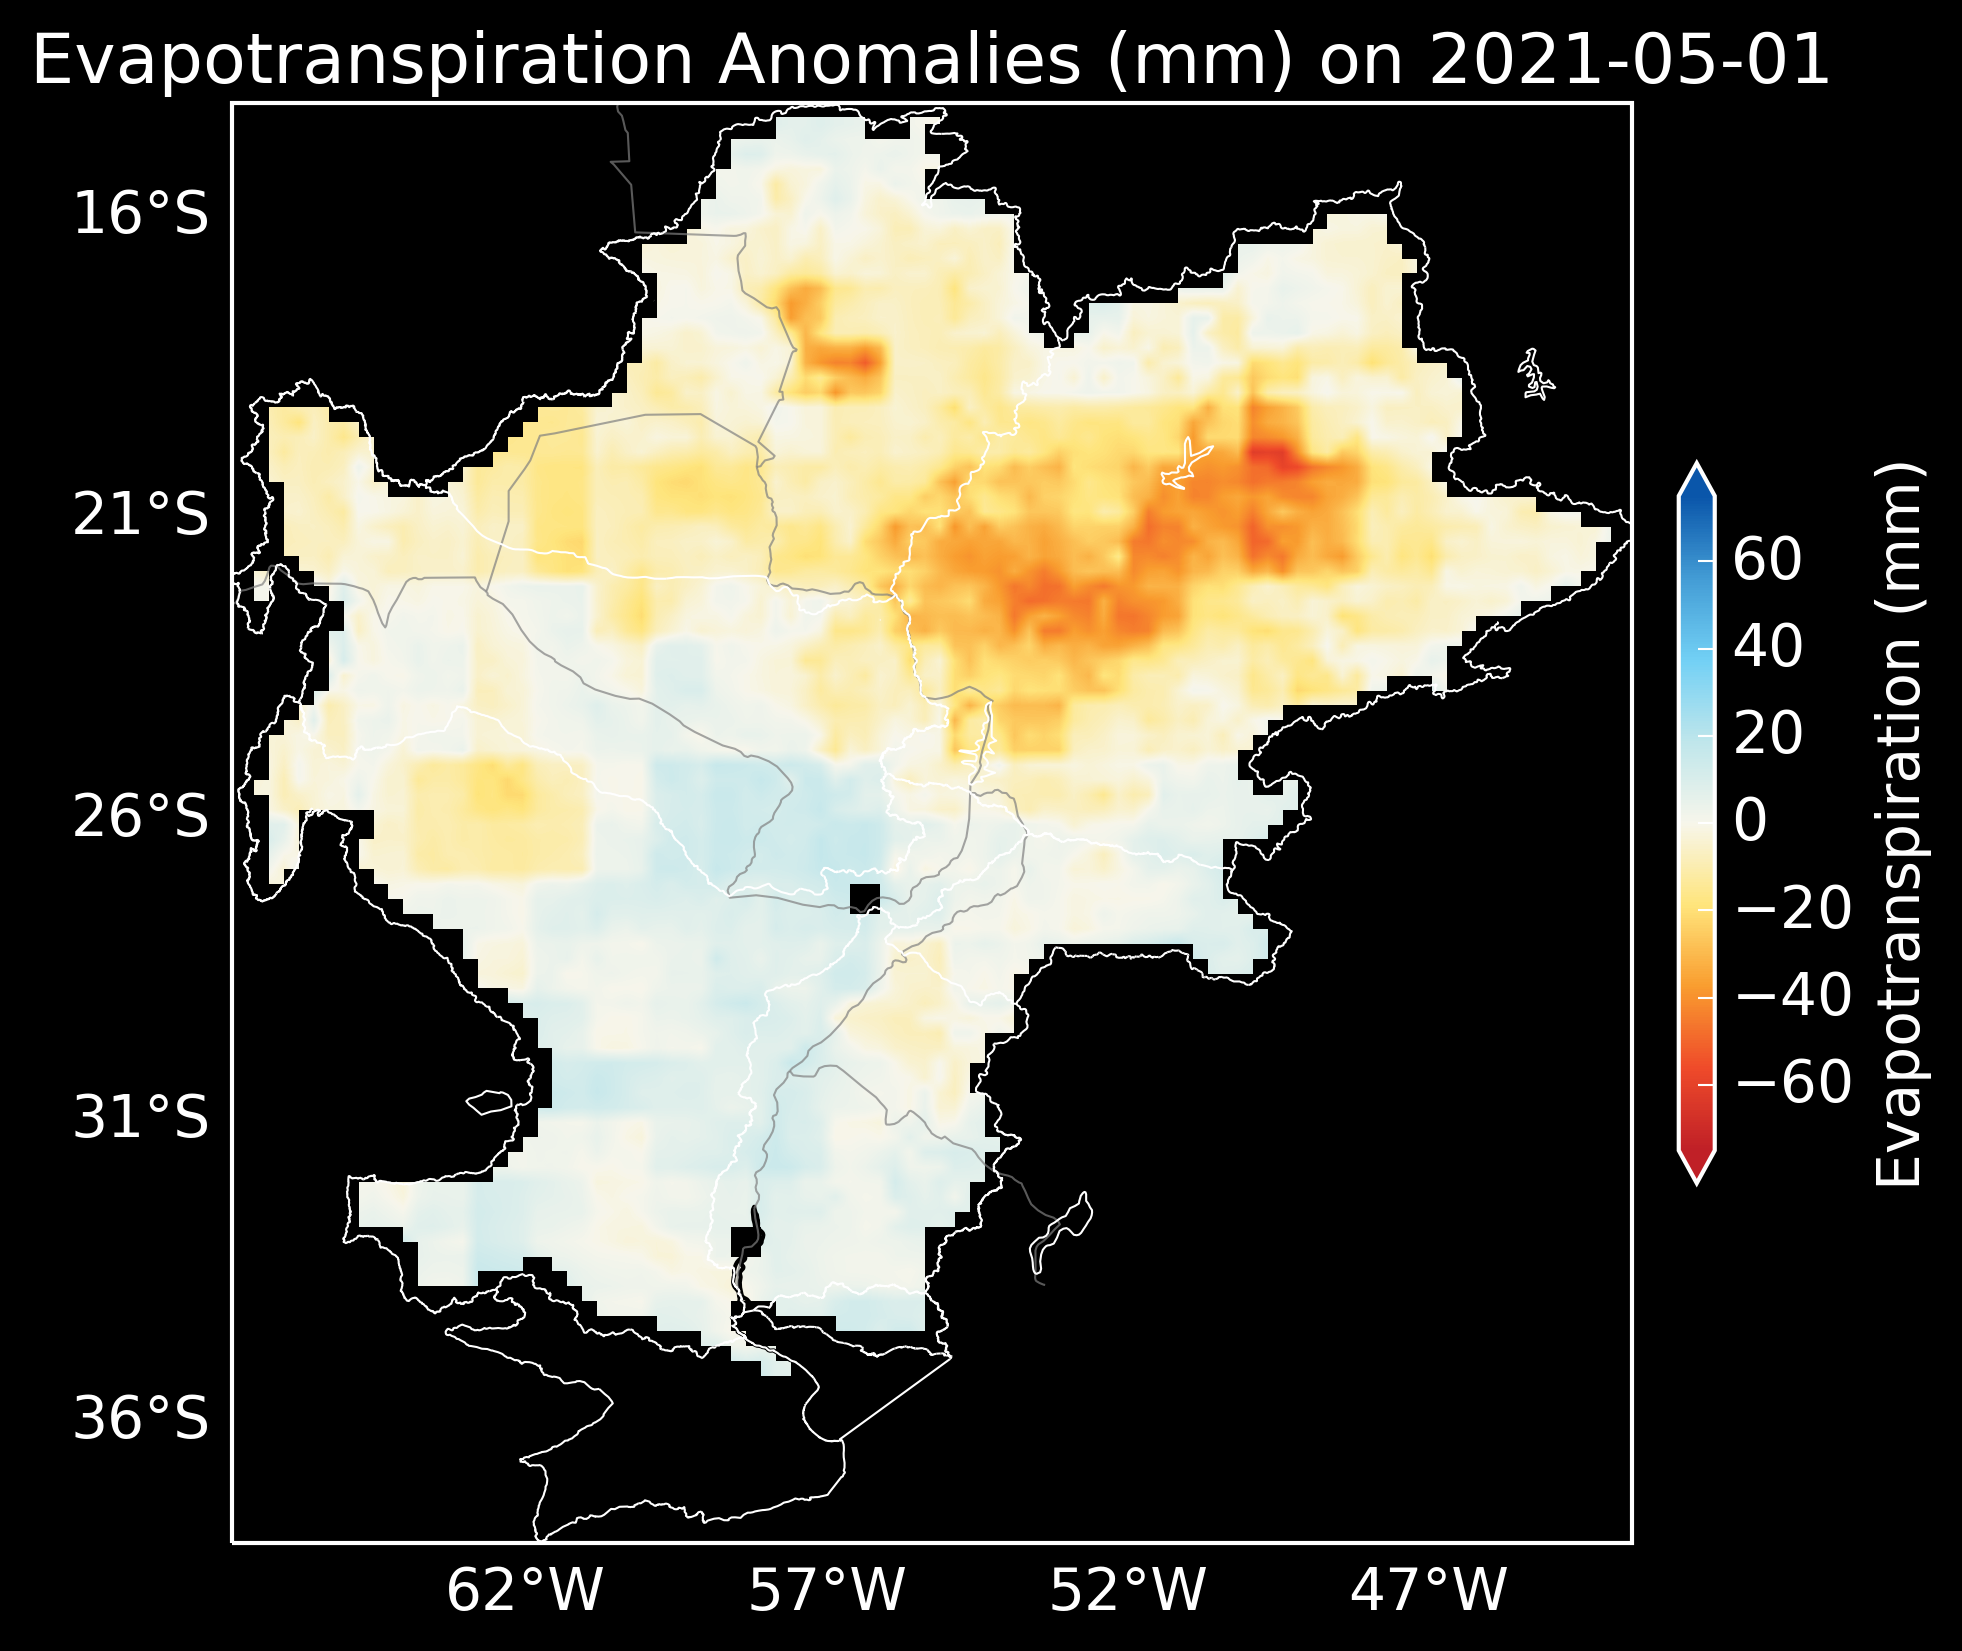

In [23]:
# ET Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 75 #set colorbar max

date = '2021-05-01' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_et.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-67, -44, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='white', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Evapotranspiration (mm)')

plt.title("Evapotranspiration Anomalies (mm) on {}".format(date))

#plt.save("C:/Users/Jessica Besnier/Documents/Personal/data viz/Dark_pics/gldas/anom_plots/ET/2015.png")

In [35]:
#runoff anomaly values extracted
r_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/r_anomaly.nc4')
shapefile_path = r'C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/river_basin_shape-file'
filename = ['la_plata']

## Precipitation conversion factor
#p_factor = 24*30 # (Since my data files are in daily format and IMERG provides data in the form of mm/hr)

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    r = r_anomaly.__xarray_dataarray_variable__.salem.roi(shape=shdf)

    r_lat = r.dropna(dim='lat',how='all')
    r_lon = r_lat.dropna(dim='lon',how='all')

    return r_lon

LPRB_r = extract_values(0)

In [24]:
#gw anomaly values extracted
gw_anomaly = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/gw_anomaly.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    gw = gw_anomaly.GWS_tavg.salem.roi(shape=shdf, all_touched = True)

    gw_lat = gw.dropna(dim='lat', how='all')
    gw_lon = gw_lat.dropna(dim='lon', how='all')

    return gw_lon

LPRB_gw = extract_values(0)

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, 'Groundwater Anomalies (mm) on 2020-08-01')

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


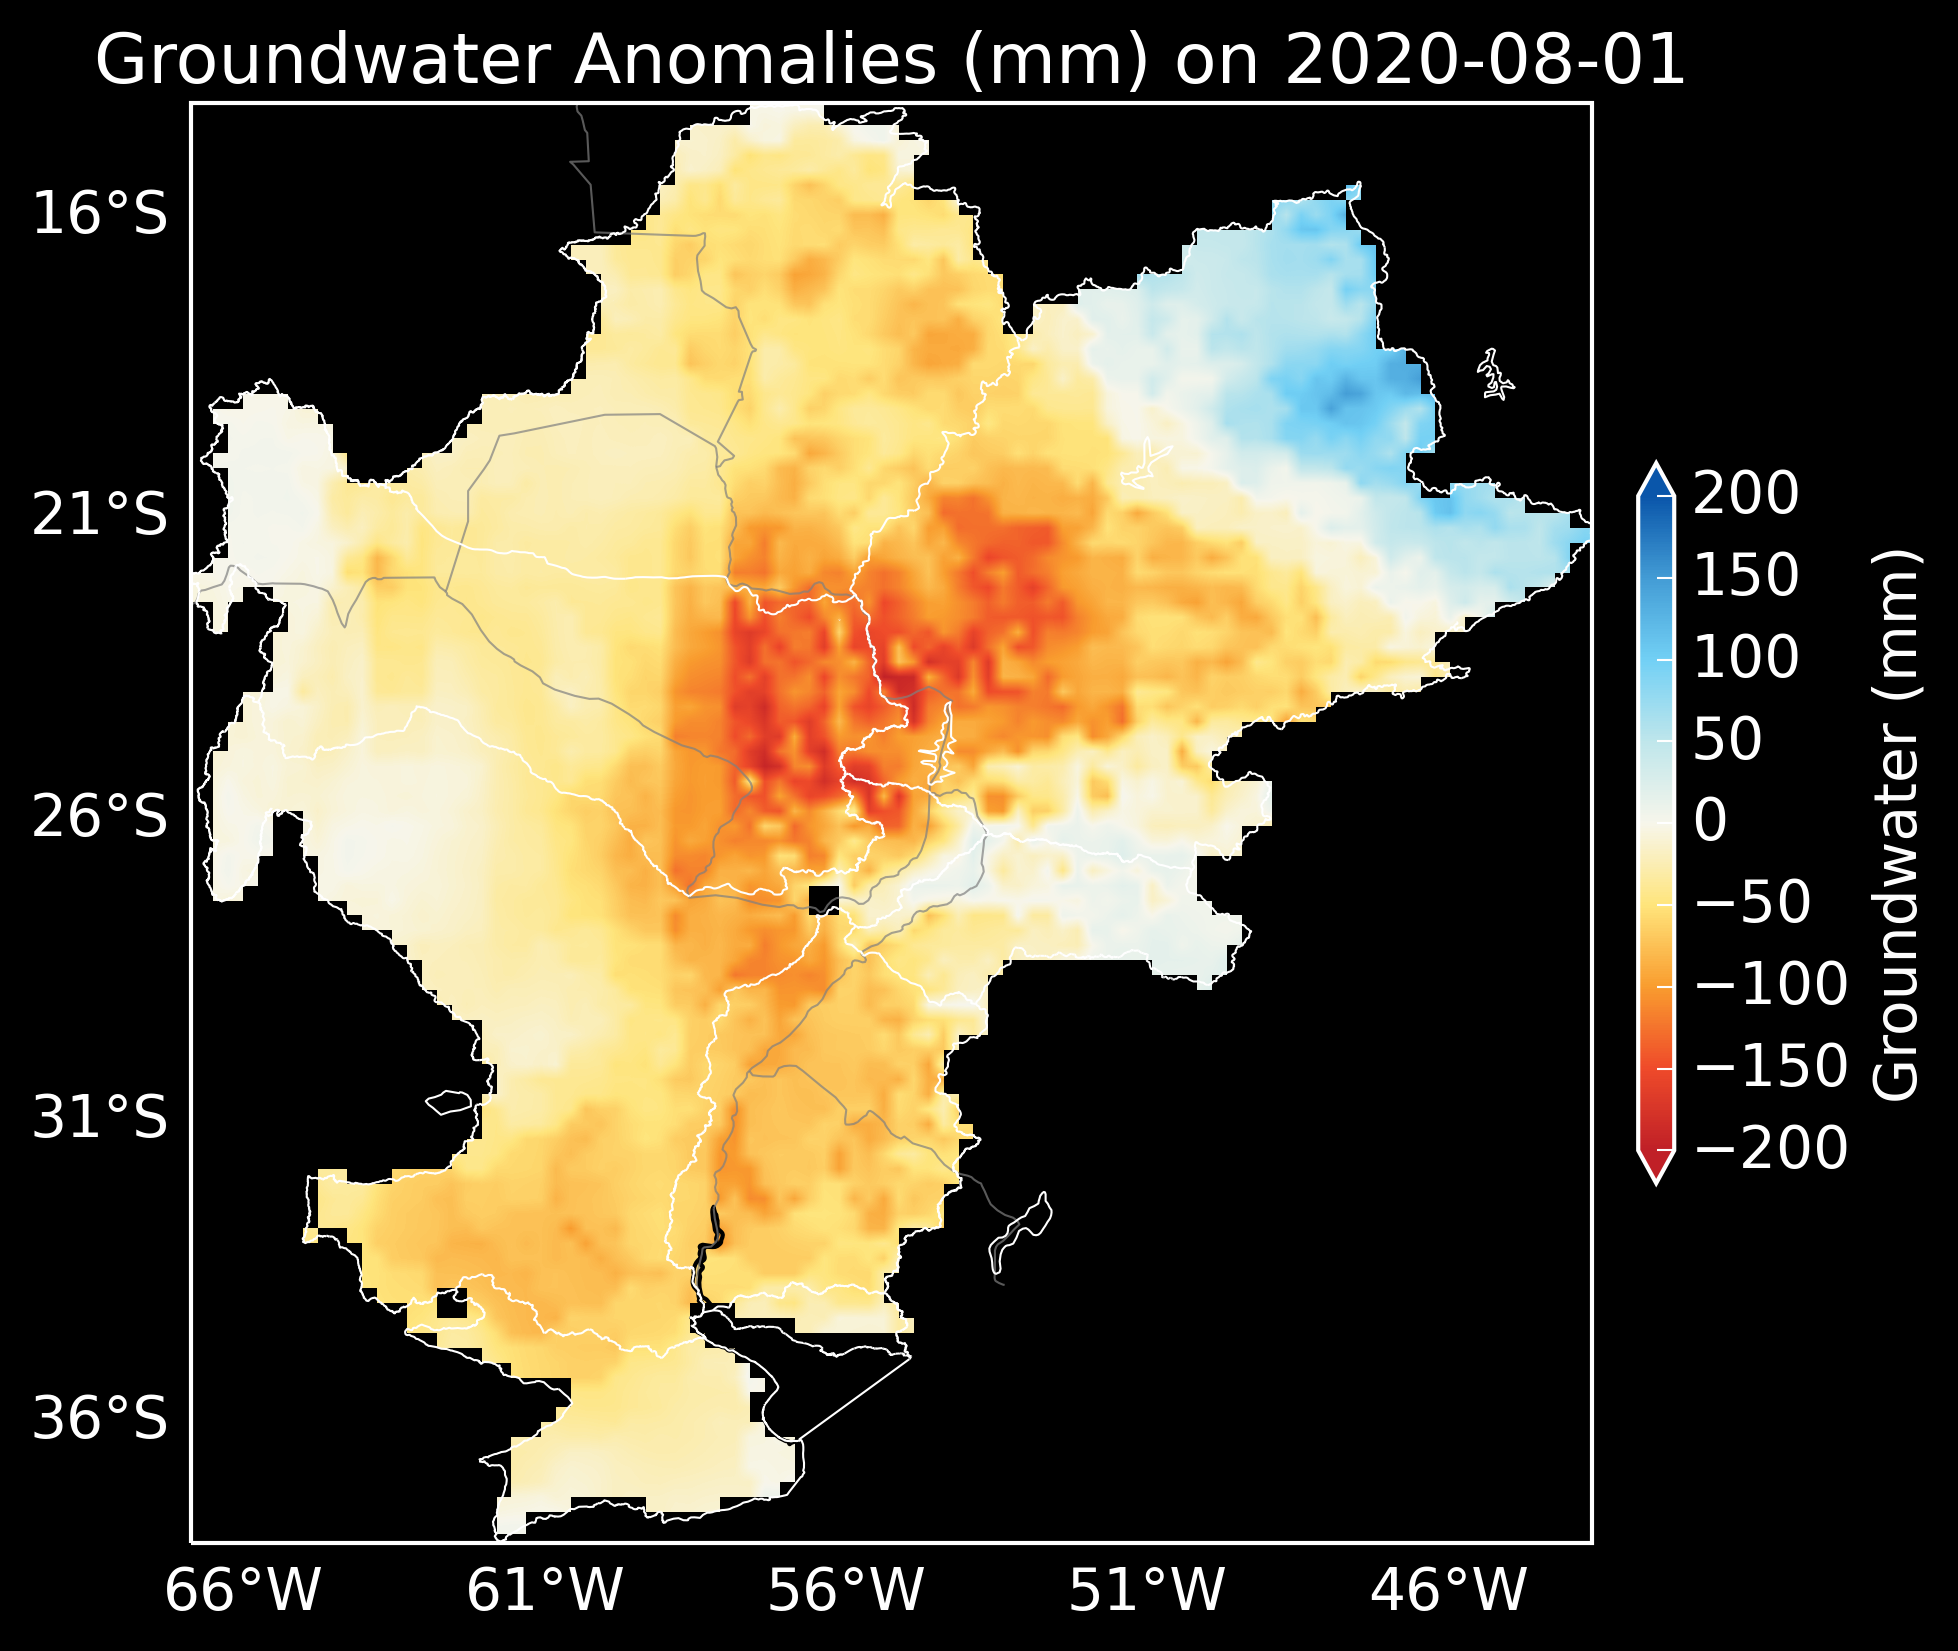

In [ ]:
# GW Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 200 #set colorbar max

date = '2021-08-01' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_gw.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-66, -42, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='white', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Groundwater (mm)')

plt.title("Groundwater Anomalies (mm) on {}".format(date))

#plt.savefig("C:\Users\Jessica Besnier\Documents\Personal\data viz\Dark_pics\gldas\anom_plots\GW\2016.png")

Soil Moisture GLDAS anomalies

In [59]:
#ssm anomaly values extracted
ssm_anomaly = xr.open_mfdataset('E:/2021/la_plata/gldas_da_anom/try_for_nc4/ssm_anomaly.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    ssm = ssm_anomaly.SoilMoist_S_tavg.salem.roi(shape=shdf, all_touched = True)

    ssm_lat = ssm.dropna(dim='lat', how='all')
    ssm_lon = ssm_lat.dropna(dim='lon', how='all')

    return ssm_lon

LPRB_ss = extract_values(0)

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


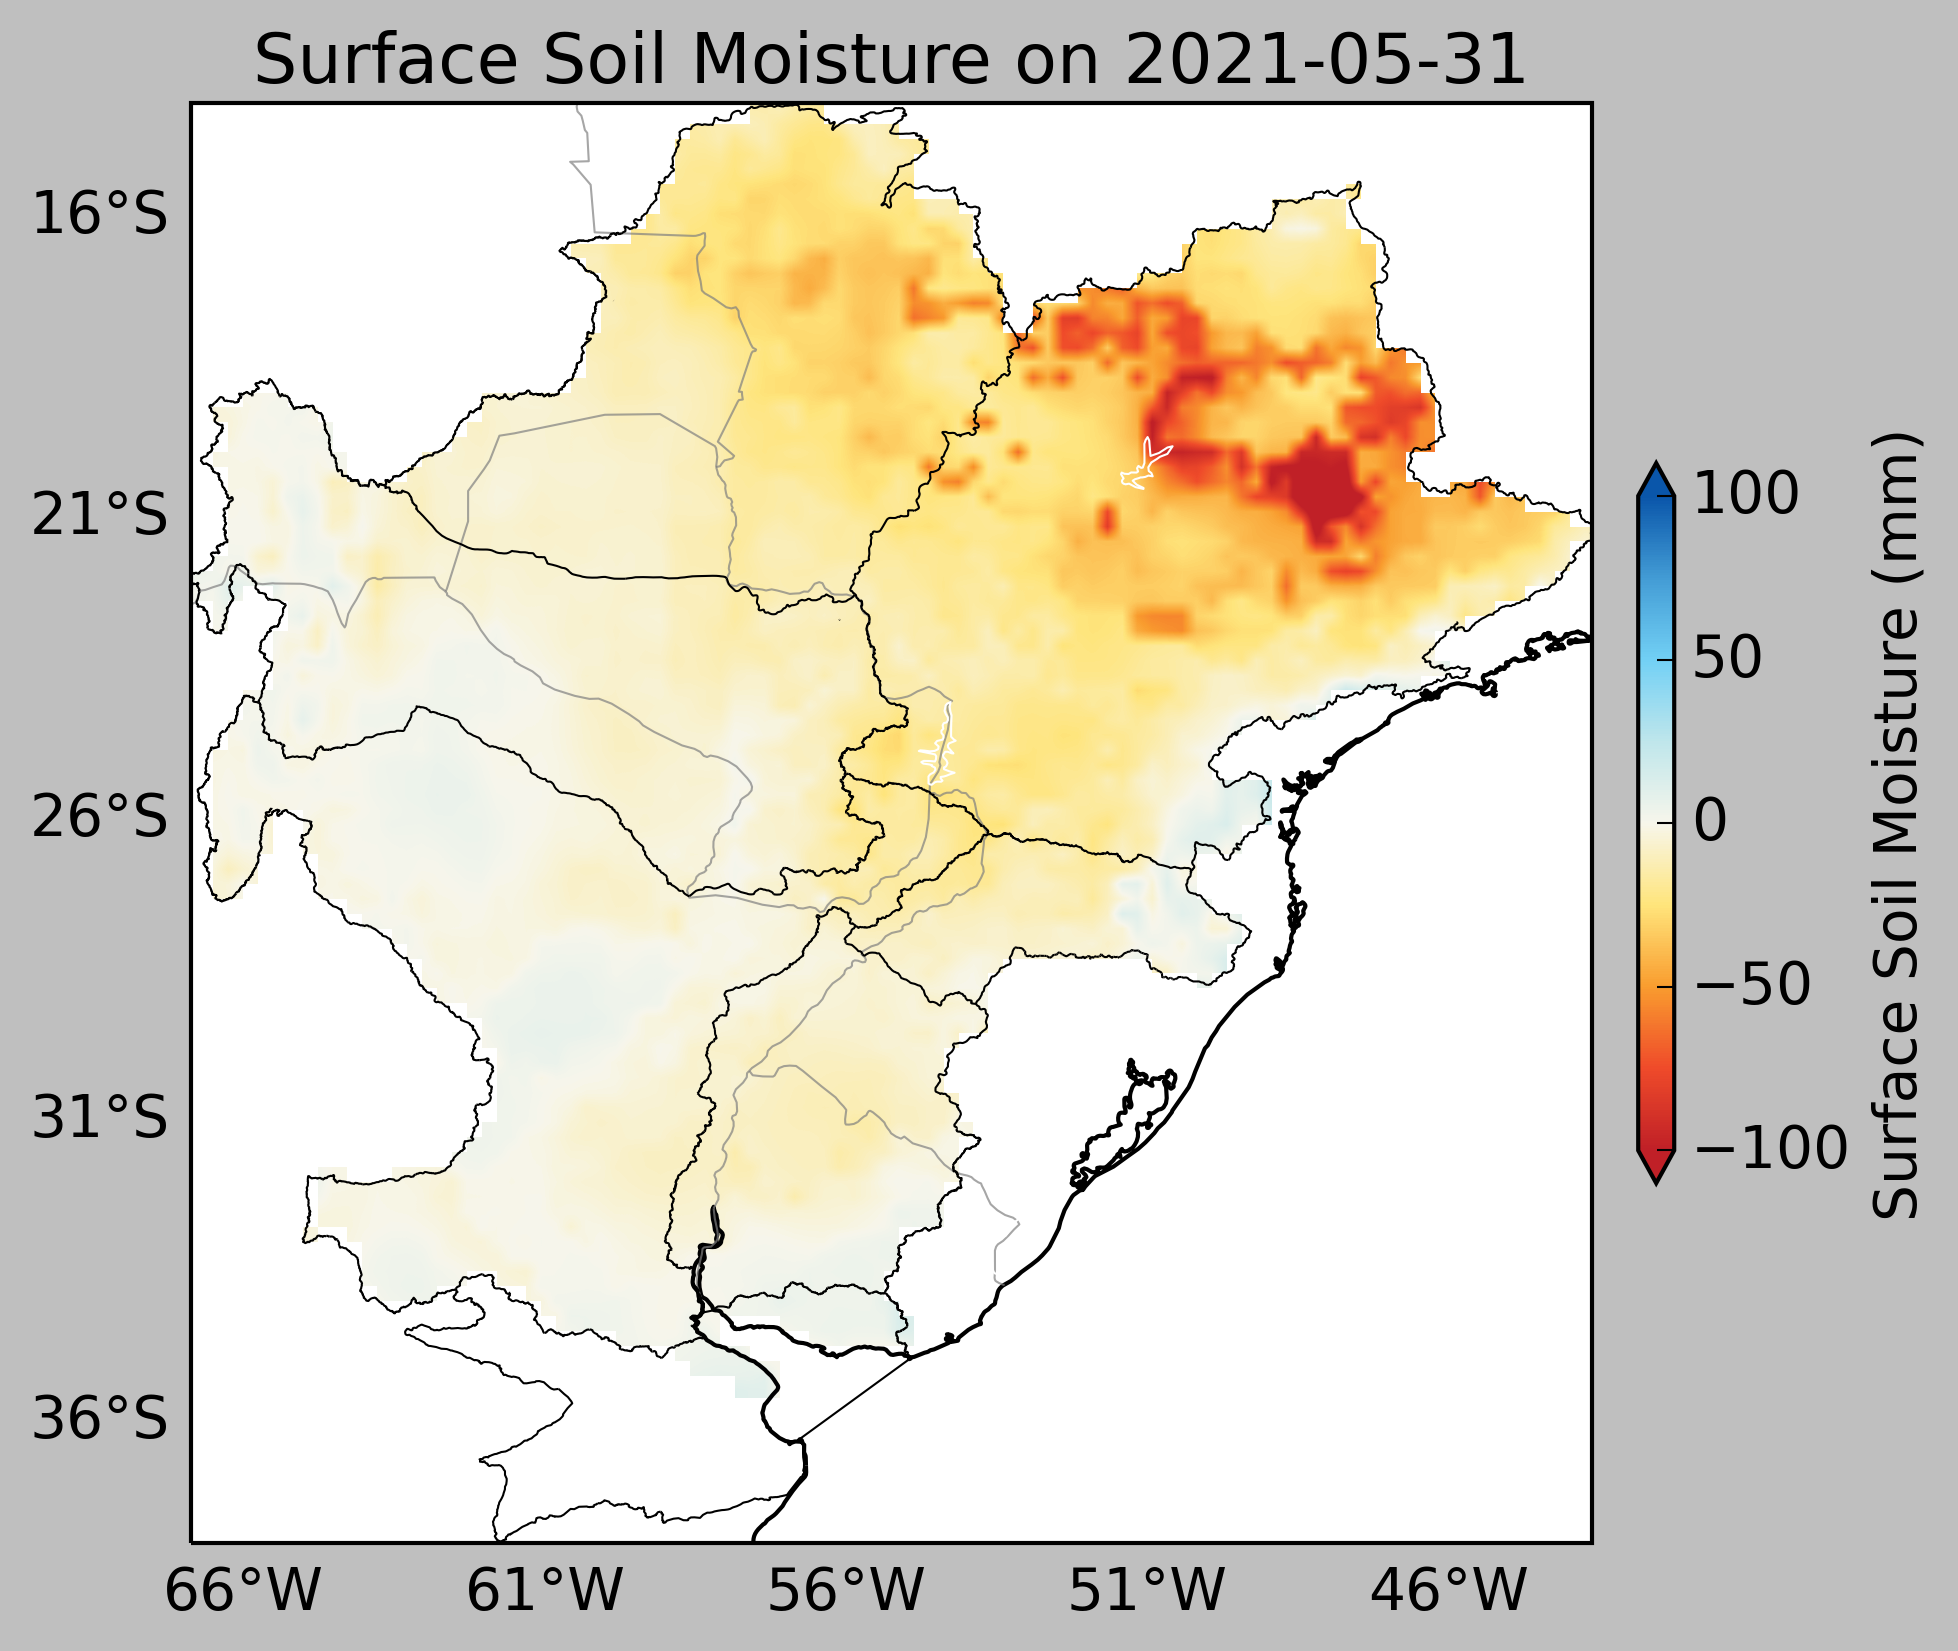

In [107]:
# SSM Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 100 #set colorbar max

date = '2021-05-31' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_ss.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-66, -42, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='black', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Surface Soil Moisture (mm)')

plt.title("Surface Soil Moisture on {}".format(date))

plt.savefig("E:/2021/la_plata/anom_spatial_plot_new/ssm_sub/another_9/2021.png")

In [ ]:
LPRB_psm = LPRB_psm1/5000

RZSM

In [109]:
#rzsm anomaly values extracted
rzsm_anomaly = xr.open_mfdataset('E:/2021/la_plata/gldas_da_anom/try_for_nc4/rzsm_anomaly.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    rzsm = rzsm_anomaly.SoilMoist_RZ_tavg.salem.roi(shape=shdf, all_touched = True)

    rzsm_lat = rzsm.dropna(dim='lat', how='all')
    rzsm_lon = rzsm_lat.dropna(dim='lon', how='all')

    return rzsm_lon

LPRB_rz = extract_values(0)

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


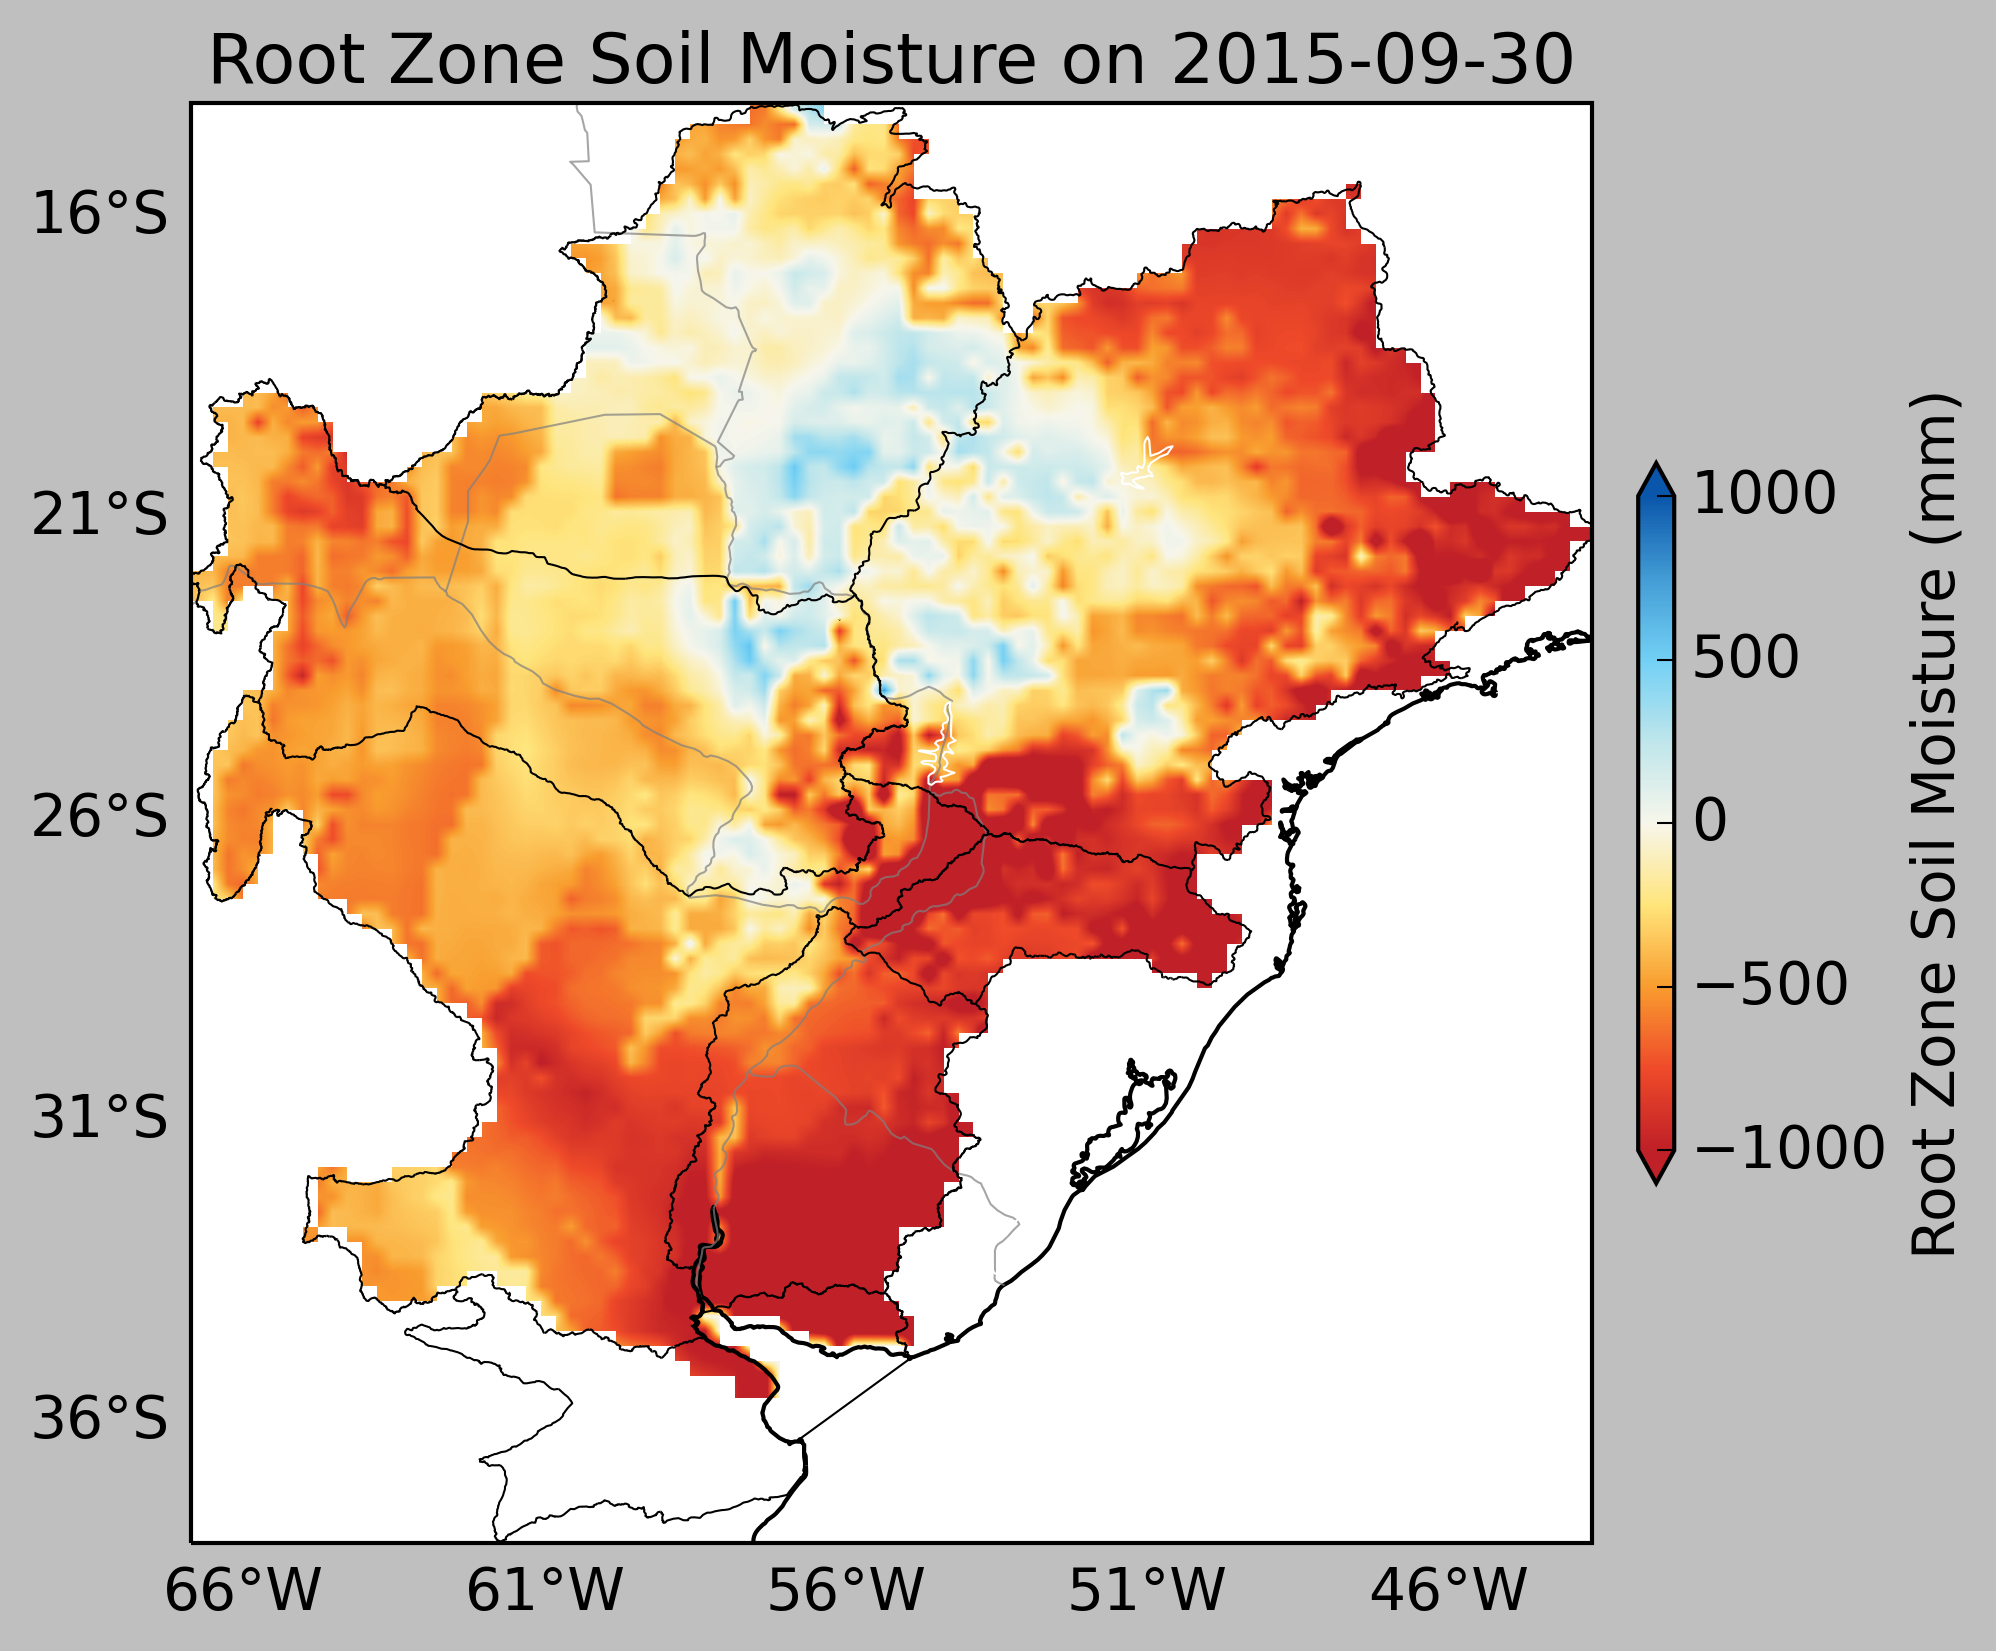

In [145]:
# SSM Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 1000 #set colorbar max

date = '2015-09-30' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_rz.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-66, -42, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='black', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Root Zone Soil Moisture (mm)')

plt.title("Root Zone Soil Moisture on {}".format(date))

plt.savefig("E:/2021/la_plata/anom_spatial_plot_new/rzsm_sub/2015.png")

Profile SM

In [122]:
#psm anomaly values extracted
psm_anomaly = xr.open_mfdataset('E:/2021/la_plata/gldas_da_anom/try_for_nc4/psm_anomaly.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    ssm = psm_anomaly.SoilMoist_P_tavg.salem.roi(shape=shdf, all_touched = True)

    ssm_lat = ssm.dropna(dim='lat', how='all')
    ssm_lon = ssm_lat.dropna(dim='lon', how='all')

    return ssm_lon

LPRB_p = extract_values(0)

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


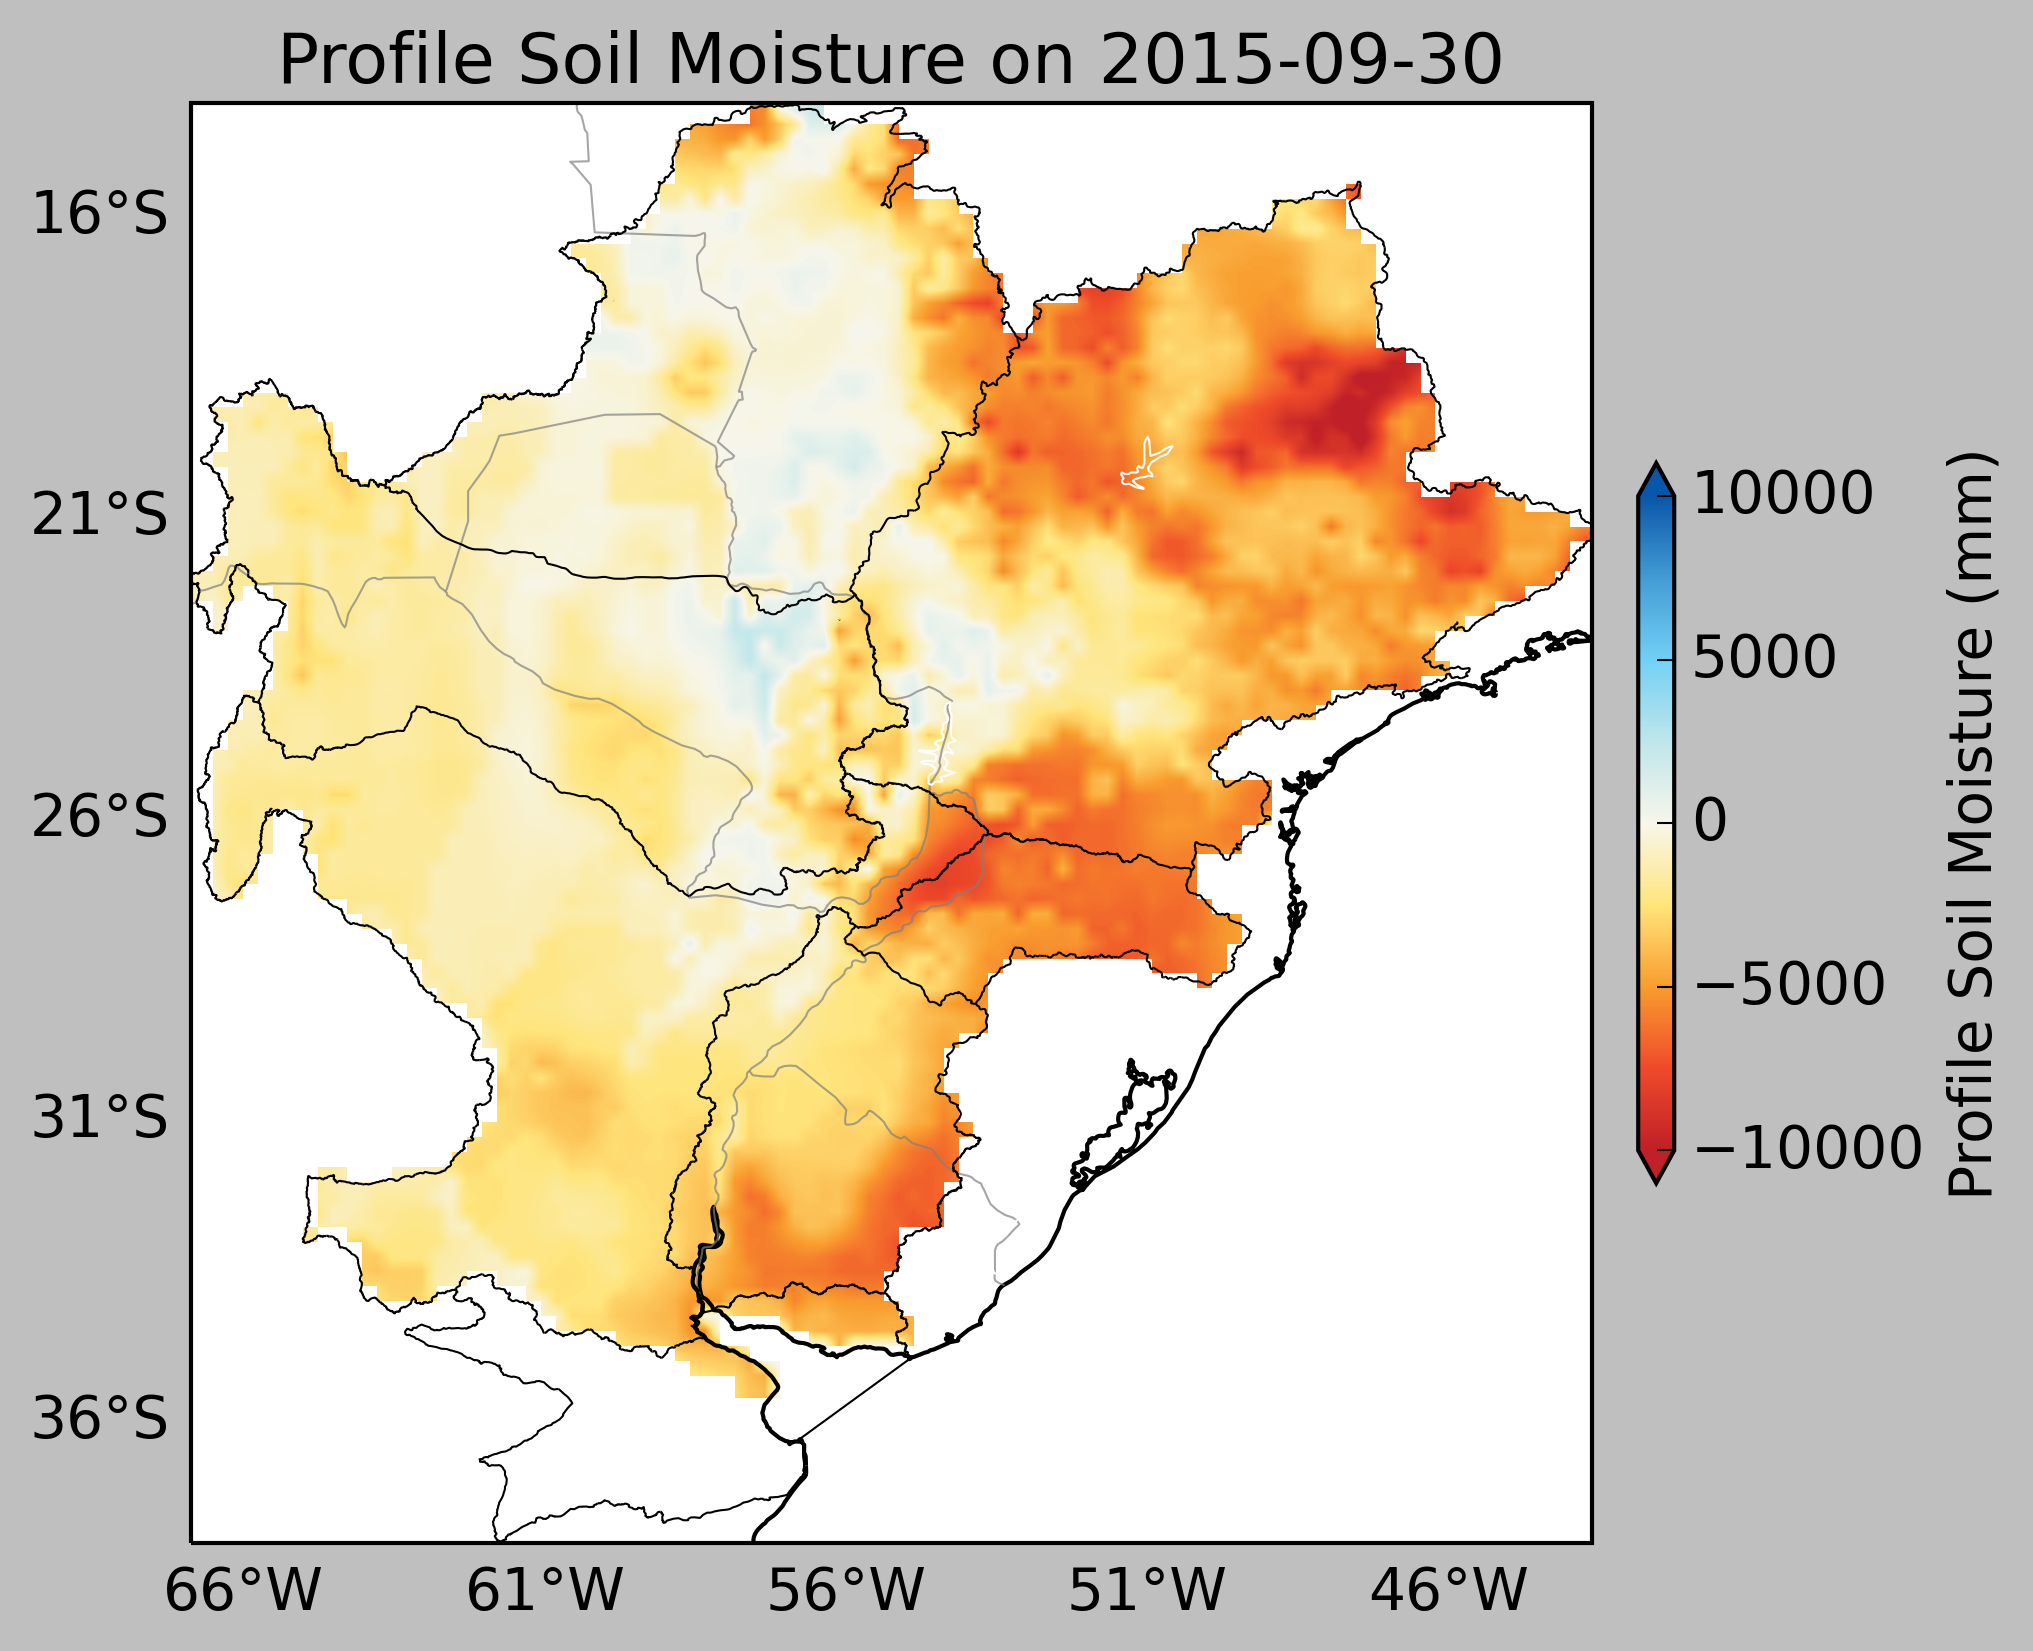

In [152]:
# PSM Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 10000 #set colorbar max

date = '2015-09-30' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_p.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-66, -42, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='black', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('Profile Soil Moisture (mm)')

plt.title("Profile Soil Moisture on {}".format(date))

plt.savefig("E:/2021/la_plata/anom_spatial_plot_new/psm_sub/aug/2015.png")

TWS

In [165]:
tws_anomaly

<xarray.Dataset>
Dimensions:                        (lon: 720, lat: 360, time: 198)
Coordinates:
  * lon                            (lon) float64 -179.8 -179.2 ... 179.2 179.8
  * lat                            (lat) float64 -89.75 -89.25 ... 89.25 89.75
  * time                           (time) datetime64[ns] 2002-04-17T12:00:00 ...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 dask.array<chunksize=(198, 360, 720), meta=np.ndarray>

In [172]:
#tws anomaly values extracted
tws_anomaly = xr.open_mfdataset('E:/2021/la_plata/gldas_da_anom/tws_anomaly_105.nc4')
shapefile_path = r'E:/2021/la_plata/SubcuencasPlata/'
filename = ['cic_cuenca_agrupada_poly'] #Note: projected in WGS 84

def extract_values(i): 
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i] + '.shp')
    tws = tws_anomaly.TWS_tavg.salem.roi(shape=shdf, all_touched = True)

    ssm_lat = tws.dropna(dim='lat', how='all')
    ssm_lon = ssm_lat.dropna(dim='lon', how='all')

    return ssm_lon

LPRB_tws = extract_values(0)

In [181]:
LPRB_grace = LPRB_tws/1000

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


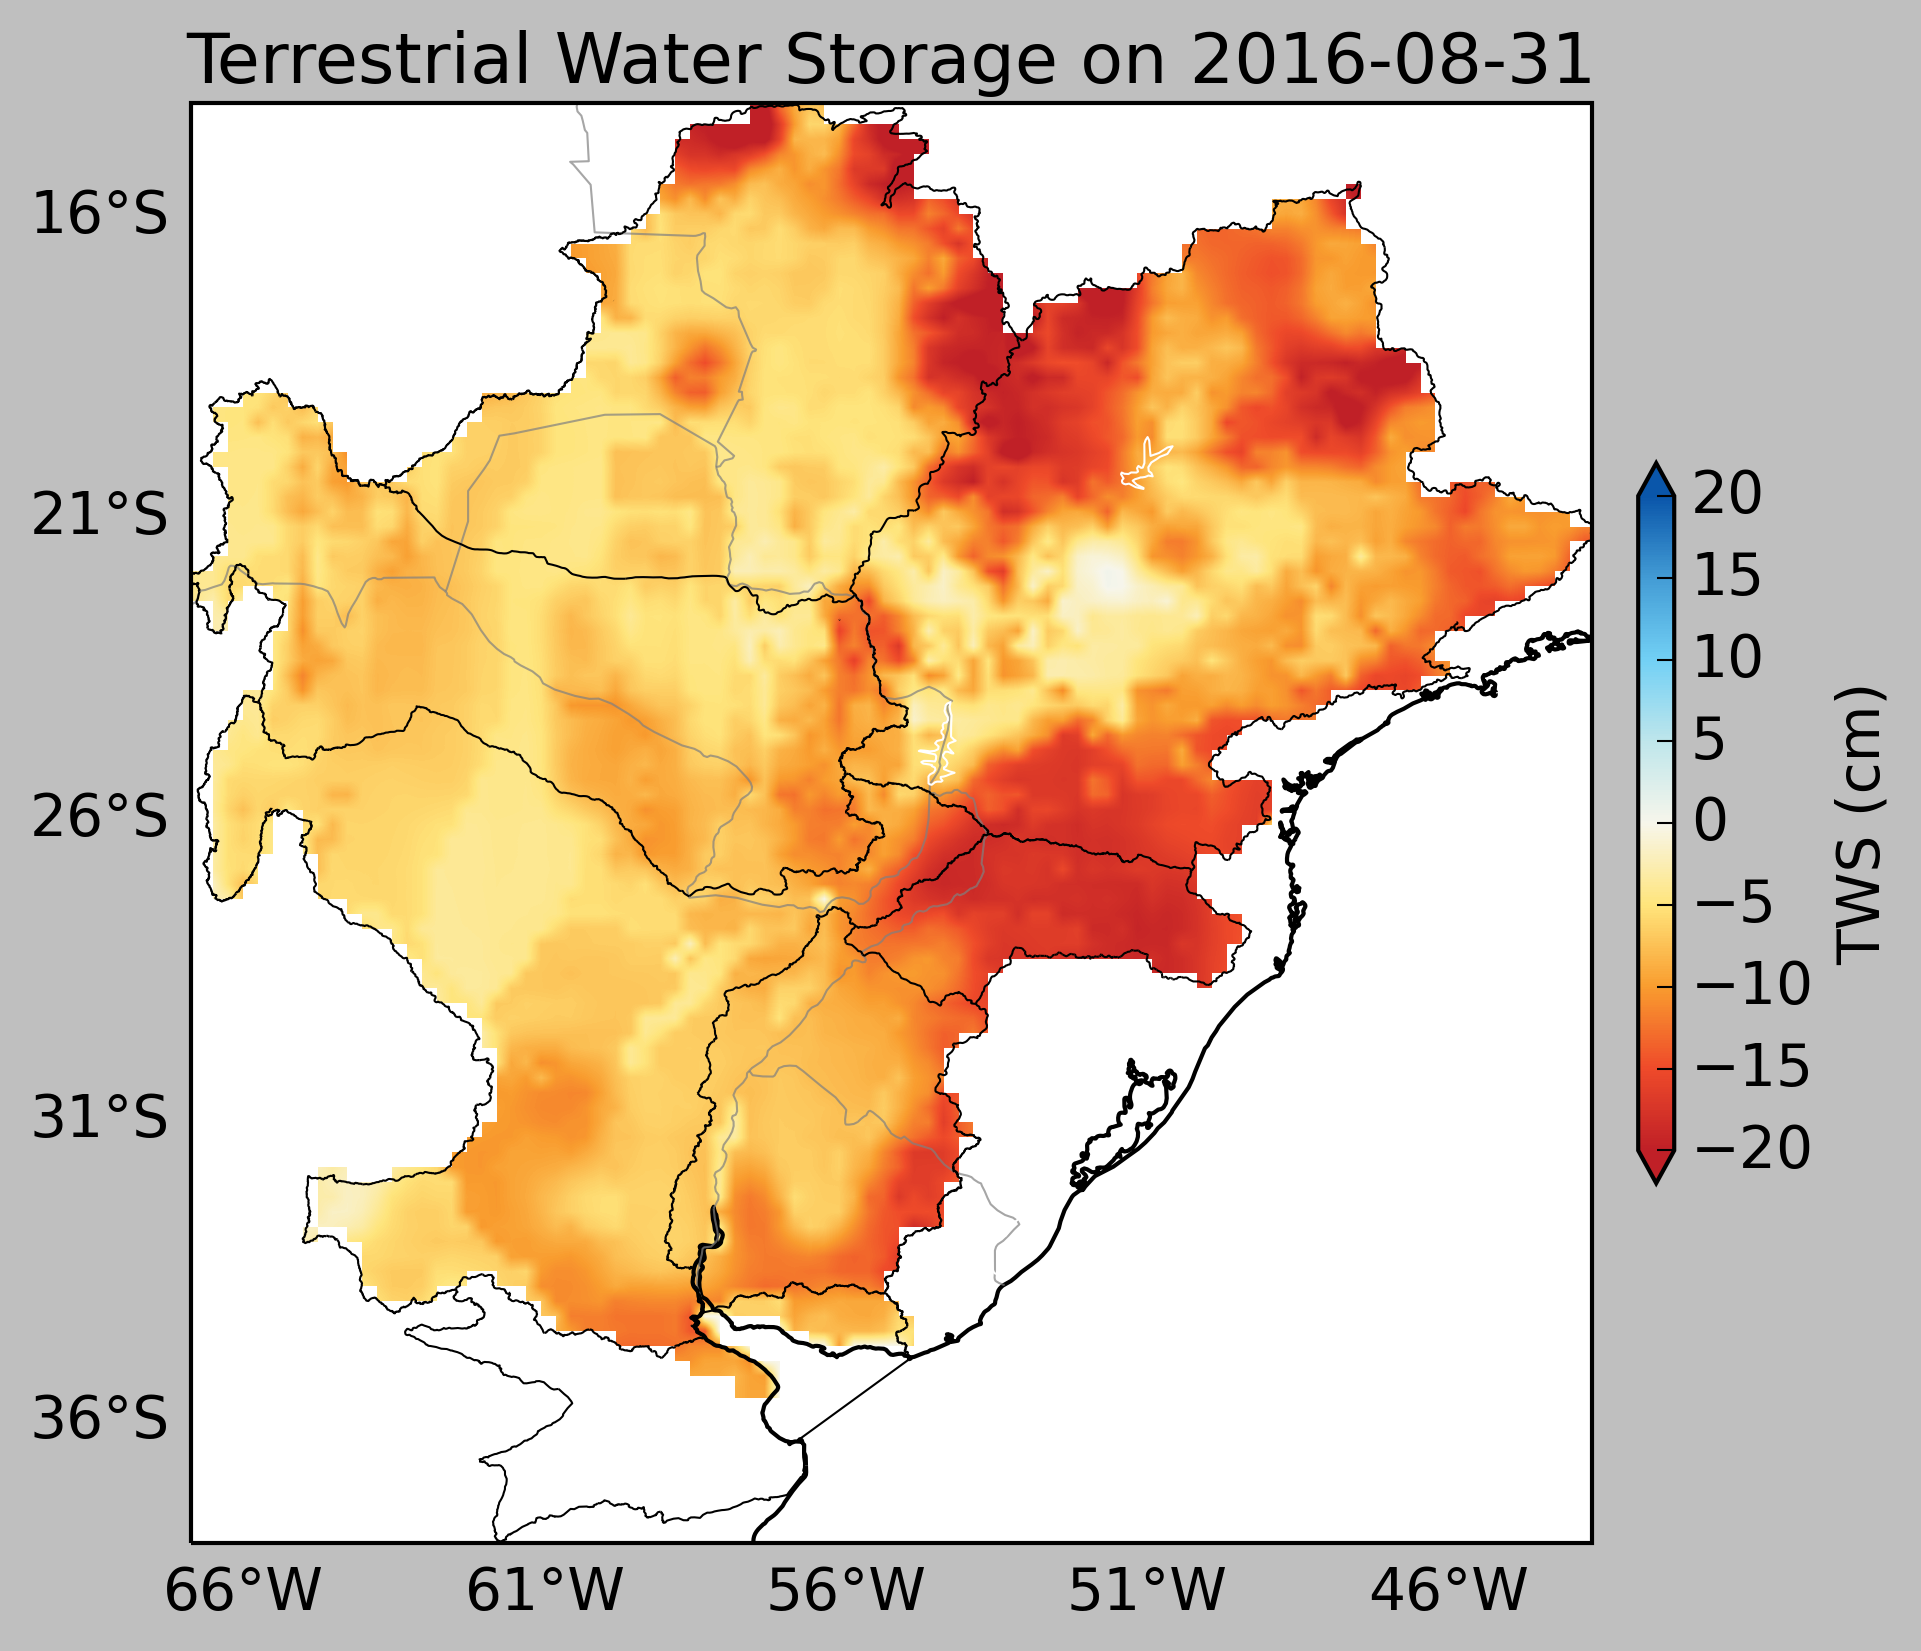

In [197]:
# TWS Spatial Plot:  
import matplotlib.colors as clr
cm2 = clr.LinearSegmentedColormap.from_list('custom blue', ['#C02027', '#EF4B2A', '#F99D2F', '#FFE57C', '#F7F6eb', '#BFE6EB', '#72D0F5', '#439CD5', '#0A56AA'], N=256)

v = 20 #set colorbar max

date = '2016-08-31' # wet date [1]
#date = '2005-11-01' # dry date [2]
#date = '2006-11-01' # [3]
#LVB_imerg.sel(time = date).plot.imshow(x='lon', y='lat', cmap = cm2, robust=True, vmin = -v, vmax = v)

p_anom = LPRB_grace.sel(time = date) 
img_extent = (p_anom.lon.values.min(), p_anom.lon.values.max(), p_anom.lat.values.min(), p_anom.lat.values.max())

fig = plt.figure(figsize = (10, 6), dpi = 300)
plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(1,1,1, extent = (-66.875, -43.625, -37.875, -14.125), projection = ccrs.PlateCarree())

ax.coastlines(resolution = '10m')
ax.add_feature(cfeature.BORDERS, color = 'grey', alpha = 0.7, linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'white', facecolor = 'None', linewidth = 0.5)  #edgecolor = '#5e81b5


# Add gridlines with corresponding grid label texts 
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 0.5, color = 'grey', alpha = 0, linestyle = '--') 
gl.xlabels_top = False
gl.ylabels_right= False
gl.xlocator = mticker.FixedLocator(range(-66, -42, 5)) # must be integer values
gl.ylocator = mticker.FixedLocator(range(-36, -13, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Read the shapefile and show it in the plot 
reader = shpreader.Reader(r"E:/2021/la_plata/SubcuencasPlata/cic_cuenca_agrupada_line.shp")
for state in reader.geometries(): 
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor = 'None', edgecolor='black', linewidth = 0.5)


#test = p_anom.transpose()

color_img = ax.imshow(p_anom.values, origin = 'lower', extent = img_extent, transform = ccrs.PlateCarree(), cmap = cm2, vmin = -v, vmax = v) 
cbar = fig.colorbar(color_img, ax = ax, shrink = 0.5, pad = 0.02, extend = 'both')
cbar.set_label('TWS (cm)')

plt.title("Terrestrial Water Storage on {}".format(date))

plt.savefig("E:/2021/la_plata/anom_spatial_plot_new/tws/2016.png")